<a href="https://colab.research.google.com/github/atoothman/Data-71200-Projects-/blob/main/Data_71200_Project_2__Glass_ID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA 71200 - Project 2 Glass Identification

This project involves the analysis of the [Glass Identification](https://archive.ics.uci.edu/dataset/42/glass+identification) dataset, sourced from the UC Irvine Machine Learning Repository. The dataset contains information on 6 types of glass defined in terms of their oxide content. The study of classification of types of glass was motivated by criminological investigation and broken glass left at crime scenes.

**Dataset Description**

1. ID Number
2. RI (refractive Index)
3. Na (Sodium)
4. MG (Magnesium)
5. Al (Aluminum)
6. Si (Silicon)
7. K (Potassium)
8. Ca (Calcium)
9. Ba (Barium)
10. Fe (Iron)
11. Type of Glass (Class)
      *   building_windows_float_processed
      *   building_windows_non_float_processed
      *   vehicle_windows_float_processed
      *   vehicle_windows_non_float_processed (none in this database)
      *   containers
      *   tableware
      *   headlamps

9 Features are included in the dataset. There are 8 continuous features, 1 integer feature and 1 categorical feature.

The categorical feature Type of Glass/"Class" is divided into seven distinct categories (listed above) which are associated with the product the glass created. "Class" will serve as the target in this project.

**Objective**
Project 2 is building off the work of [Project 1](https://colab.research.google.com/drive/1i24JixOkYadlSOzYcKsIA-W-WyRru1XJ#scrollTo=VQdeW82USQMA).

The objective of this project is the application of two supervised learning algorithms (K-Nearest Neighbor and Decision Trees) with a range of parameter settings to determine which performs better.

The categorical feature "Class" is divided into seven distinct categories which are associated with the types the glass. "Class" will serve as the target in this project.

# Step 1: Load your data, including testing/training split from Project 1

### Load Data from project 1 and drop ID Column


In [5]:
import pandas as pd

# Raw URL of the dataset file on GitHub
url = "https://raw.githubusercontent.com/atoothman/Data-71200-Projects-/main/glass%2Bidentification/glass.data"


# Load the dataset into DataFrame
glass_df = pd.read_csv(url, header=None, index_col=False, names=[
    'ID', 'Refractive Index', 'Sodium', 'Magnesium', 'Aluminum',
    'Silicon', 'Potassium', 'Calcium', 'Barium', 'Iron', 'Class'])

# Display the DataFrame before dropping 'ID'
print("Before dropping 'ID':")
print(glass_df.head())

# Drop the 'ID' column
glass_df.drop(columns=['ID'], inplace=True)

# Display the DataFrame after dropping 'ID'
print("\nAfter dropping 'ID':")
print(glass_df.head())

Before dropping 'ID':
   ID  Refractive Index  Sodium  Magnesium  Aluminum  Silicon  Potassium  \
0   1           1.52101   13.64       4.49      1.10    71.78       0.06   
1   2           1.51761   13.89       3.60      1.36    72.73       0.48   
2   3           1.51618   13.53       3.55      1.54    72.99       0.39   
3   4           1.51766   13.21       3.69      1.29    72.61       0.57   
4   5           1.51742   13.27       3.62      1.24    73.08       0.55   

   Calcium  Barium  Iron  Class  
0     8.75     0.0   0.0      1  
1     7.83     0.0   0.0      1  
2     7.78     0.0   0.0      1  
3     8.22     0.0   0.0      1  
4     8.07     0.0   0.0      1  

After dropping 'ID':
   Refractive Index  Sodium  Magnesium  Aluminum  Silicon  Potassium  Calcium  \
0           1.52101   13.64       4.49      1.10    71.78       0.06     8.75   
1           1.51761   13.89       3.60      1.36    72.73       0.48     7.83   
2           1.51618   13.53       3.55      1.54    

Dropped ID column as it contained sequential numbers for the dataset which is redundant information and provided by the index column

### Show info and description of data


In [6]:
# Display glass_data DF and check that all features are listed
display(glass_df)

# Show info on glass_df
print("Info on glass_df:")
glass_df.info()
print()

# Show description of glass_df
print("Description of glass_df:")
glass_df.describe()

,Refractive Index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Class
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


Info on glass_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Refractive Index  214 non-null    float64
 1   Sodium            214 non-null    float64
 2   Magnesium         214 non-null    float64
 3   Aluminum          214 non-null    float64
 4   Silicon           214 non-null    float64
 5   Potassium         214 non-null    float64
 6   Calcium           214 non-null    float64
 7   Barium            214 non-null    float64
 8   Iron              214 non-null    float64
 9   Class             214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB

Description of glass_df:


,Refractive Index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Class
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


### Divide into a training set and testing set

To create a balanced split StratifiedShuffleSplit will be utilized below with a 20% test size and 80% training size

In [7]:
# Utilize scikitlearn for a stratify split
from sklearn.model_selection import StratifiedShuffleSplit

# Separate the features (X) and the target variable (y) aka Class
X = glass_df.drop('Class', axis=1)
y = glass_df['Class']

# Create StratifiedShuffleSplit with 1 split, 20% test size, 80% training and random state 42
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# Split data
for train_index, test_index in split.split(X, y):
   X_train = X.iloc[train_index]
   X_test = X.iloc[test_index]
   y_train = y.iloc[train_index]
   y_test = y.iloc[test_index]

# Check to confirm successful 80 : 20 split
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (171, 9)
X_test: (43, 9)
y_train: (171,)
y_test: (43,)


Confirming the split was successful. The training set has 80% of the original 214 instances, while the testing set has 20% of the original instances. 9 in the X-train and X_test show the number of columns/features.

### Check for missing values in the training and testing set

In [8]:
# Checking missing values in training set

# Check for missing values in X_train
missing_values = X_train.isnull().sum()

# Print missing values in X_train
print("Missing Values in X_train:")
print(missing_values)
print()

# Check for missing values in y_train
missing_values = y_train.isnull().sum()

# Print missing values in y_train
print("Missing Values in y_train:")
print(missing_values)

# Checking missing values in test set

# Check for missing values in X_test
missing_values = X_test.isnull().sum()

# Print missing values in X_test
print("Missing Values in X_test:")
print(missing_values)
print()

# Check for missing values in y_test
missing_values = y_test.isnull().sum()

# Print missing values in y_test
print("Missing Values in y_test:")
print(missing_values)

Missing Values in X_train:
Refractive Index    0
Sodium              0
Magnesium           0
Aluminum            0
Silicon             0
Potassium           0
Calcium             0
Barium              0
Iron                0
dtype: int64

Missing Values in y_train:
0
Missing Values in X_test:
Refractive Index    0
Sodium              0
Magnesium           0
Aluminum            0
Silicon             0
Potassium           0
Calcium             0
Barium              0
Iron                0
dtype: int64

Missing Values in y_test:
0


0 missing values in training and testing set

# Step 2: Prepare your data



*   Variables are converted to categorical variables
*   Perform any necessary feature scaling

### Convert Variables

The target variable "Class" is already a categorical variable an encoded as an integer: 1, 2, 3, 4, 5, 6, or 7. No need to convert with on hot encoded. No need to convert to ordinal as the classes are associated with glass from a particular object. For example, class 6 is table glass. They are not actually ranked.

In [9]:
# Target is already encoded as integer
display(y_train)

201    7
38     1
30     1
48     1
71     2
      ..
198    7
63     1
157    3
150    3
178    6
Name: Class, Length: 171, dtype: int64

### Feature Scaling

Feature scaling on X_Train and X_test in preparation to use in Step 4 for K-nearest Neighbors (KNN) algorithm. KNN is sensitive to the scale of features due to it calculating distances between points to understand similarity. The features will be scaled on the range between 0 and 1.

y_train and y_test will not have feature scaling applied. Feature scaling will not be applied to the decision tree algorthim in Step 4 because it uses splits in the data.

In [10]:
# Feature Scaling on X_train, no scaling needed for y_train

# Scaling method below used from class 6 lab

# Compute the minimum value per feature on the training set
min_on_training = X_train.min(axis=0)

# Compute the range of each feature (max - min) on the training set
range_on_training = (X_train - min_on_training).max(axis=0)

# subtract the min, divide by range
# afterward, min=0 and max=1 for each feature
X_train_scaled = (X_train - min_on_training) / range_on_training
print("X_train: Minimum for each feature\n", X_train_scaled.min(axis=0))
print()
print("X_train: Maximum for each feature\n", X_train_scaled.max(axis=0))
print()


X_train: Minimum for each feature
 Refractive Index    0.0
Sodium              0.0
Magnesium           0.0
Aluminum            0.0
Silicon             0.0
Potassium           0.0
Calcium             0.0
Barium              0.0
Iron                0.0
dtype: float64

X_train: Maximum for each feature
 Refractive Index    1.0
Sodium              1.0
Magnesium           1.0
Aluminum            1.0
Silicon             1.0
Potassium           1.0
Calcium             1.0
Barium              1.0
Iron                1.0
dtype: float64



In [11]:
# Feature Scaling on X_test, no scaling needed for y_test

# Compute the minimum value per feature on the test set
min_on_testing = X_test.min(axis=0)

# Compute the range of each feature (max - min) on the test set
range_on_testing = (X_test - min_on_testing).max(axis=0)

# subtract the min, divide by range
# afterward, min=0 and max=1 for each feature
X_test_scaled = (X_test - min_on_testing) / range_on_testing
print("X_test: Minimum for each feature\n", X_test_scaled.min(axis=0))
print()
print("X_test: Maximum for each feature\n", X_test_scaled.max(axis=0))

X_test: Minimum for each feature
 Refractive Index    0.0
Sodium              0.0
Magnesium           0.0
Aluminum            0.0
Silicon             0.0
Potassium           0.0
Calcium             0.0
Barium              0.0
Iron                0.0
dtype: float64

X_test: Maximum for each feature
 Refractive Index    1.0
Sodium              1.0
Magnesium           1.0
Aluminum            1.0
Silicon             1.0
Potassium           1.0
Calcium             1.0
Barium              1.0
Iron                1.0
dtype: float64


# Step 3: Examine your target attribute

Examine and plot the distribution of the target attribute in your training set (e.g., is it Gaussian, uniform, logarithmic). This will help you interpret the performance of different algorithms on your data.

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

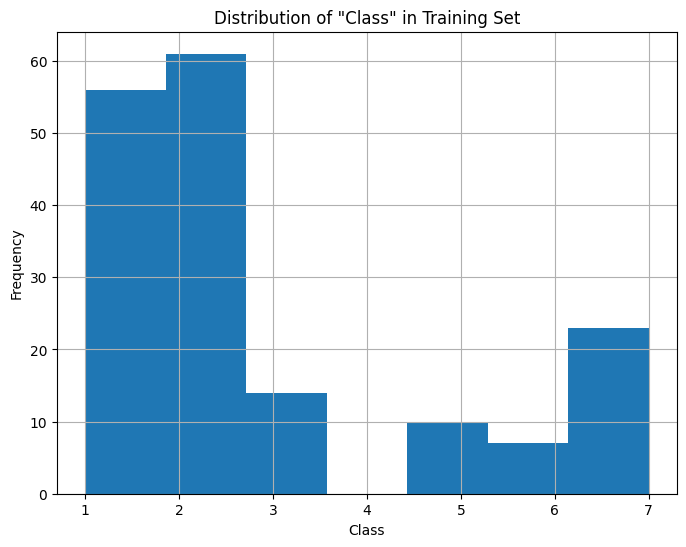

In [14]:
# y_train is the target variable

# Plotting histogram of class distribution in training set
# 7 Bins selected because there are 7 in unique classes in target variable
plt.figure(figsize=(8, 6))
plt.hist(y_train, bins=7)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Distribution of "Class" in Training Set')
plt.xticks([1, 2, 3, 4, 5, 6, 7])
plt.grid(True)
plt.show()

When examining the histogram above, the distrubution shows an imbalance across the dataset. The above graph does not display typical gaussian, uniform or logarithmic distribution. Due to the imbalance, this could impact the performance when using algorithms that are sensitive to distribution, like K-Nearest Neighbors. Becuase of the drastic difference in frequency seen in classes, class 2 could potientally influence the predictions, by creating a bias where the class 2 neighbors outnumber another class like 6. This will need to be taken into account when examining how KNN performs.

Decision trees are less sensitive to class imbalance and will be used in Step 4.

# Step 4: Supervised learning algorithms,
K-Nearest Neighbor
Decision Trees (Single Tree)

# Step 5: For each of your selected models (KNN and Decision tree)



*   Run with the default parameters, training on your training set and testing on your testing set
  *   Calculate precision, recall, and F1



*   Run with the default parameters using cross-validation on the whole dataset
  *   Calculate precision, recall, and F1




*   (Where possible) adjust 2-3 parameters for each model using grid search
  *   Report evaluation metrics for the best and worst-performing parameter settings
